In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

import nbi

In [2]:
print(nbi.__version__)

0.3.1


here we consider a very simple sine wave model, where t is time, f is frequency, A is amplitude, and $\phi_0$ is initial phase:

$f(t) = A\cdot\sin(f\cdot t+\phi_0$)

In [3]:
import TripleLensing
TRIL = TripleLensing.TripleLensing()

In [4]:
n = 200
Y = np.linspace(-0.5,0.5,n)
secnum = 45 # divide the source bondary into how many parts
basenum = 2 # the number density of sampled dots among each part
quaderr_Tol = 1e-3 # the Quadrupole test tolerance
relerr_Tol = 1e-3 # the relative error tolerance for magnification


def triple(params):
    
    q1 = 10**params[0]
    q2 = 10**params[1]
    s1 = 10**params[2]
    s2 = 10**params[3]
    
    mlens = [1, q1, q2]
    zlens = [0, 0, s1, 0, s2, 0]

    u0 = params[4] if np.abs(params[4])>1e-2 else 1e-2

    X = np.zeros(n) + u0

    mags = TRIL.TriLightCurve(mlens, zlens, X, Y, 0, secnum, basenum, quaderr_Tol, relerr_Tol)
    mags = np.array(mags)
    return mags

In [6]:
# define prior space of interest

from scipy.stats import uniform, truncnorm
prior = {
    'log(q1)': uniform(loc=-4, scale=2),
    'log(q2)': uniform(loc=-4, scale=2),
    'log(s1)': uniform(loc=-0.1, scale=0.2),
    'log(s2)': uniform(loc=-0.2, scale=0.2),
    'u0': uniform(loc=-0.4, scale=0.8)
}
labels = list(prior.keys())
prior = [prior[k] for k in labels]

# Multiple inference (amortized training)
if we care about a large number of different x_obs, then train nbi for only 1 round on more samples generated from the prior space of interest

In [7]:
# hyperparameters for the normalizing flow
flow_config = {
    'flow_hidden': 32,
    'num_cond_inputs': 32,
    'num_blocks': 5
}

# the NBI package provides predefined featurizer NNs for certain types of data
# including 1D sequences
featurizer_config = {
    'type': 'sequence',
    'dim_in': 1,
    'dim_conv_max': 64,
    'depth': 3
}


# initialize NBI engine
engine = nbi.NBI(
    featurizer_config,
    flow_config=flow_config,
    simulator=triple,
    noise=np.array([0.01]),
    prior=prior,
    labels=labels,
    n_jobs=14,
    directory='triple',
    X=np.load('triple/0_x.npy'),                      # To use saved training set: X = np.load('test/0_x.npy')
    Y=np.load('triple/0_y.npy')                      # To use saved training set: X = np.load('test/0_x.npy')
)

engine.fit(
    n_rounds=1,
    n_per_round=14000*2,
    n_epochs=25,
    lr=0.002
)

Use precomputed simulations for round  0

---------------------- Round: 0 ----------------------


Epoch 1: Train, Loglike in nats: -6.049485:  20%|██        | 5120/25200 [00:15<01:02, 322.11it/s]


Epoch 1: Train, Loglike in nats: -5.817318:  41%|████      | 10304/25200 [00:31<00:45, 325.72it/s]


Epoch 1: Train, Loglike in nats: -5.709506:  61%|██████    | 15424/25200 [00:47<00:30, 322.05it/s]


Epoch 1: Train, Loglike in nats: -5.565142:  82%|████████▏ | 20544/25200 [01:02<00:14, 326.01it/s]


Epoch 1: Train, Loglike in nats: -5.478441: 100%|█████████▉| 25152/25200 [01:16<00:00, 327.73it/s]

- Val, Loglike in nats: -4.917057:  27%|██▋       | 768/2800 [00:00<00:02, 942.15it/s]


- Val, Loglike in nats: -4.912900:  98%|█████████▊| 2752/2800 [00:02<00:00, 951.08it/s]

  0%|          | 0/25200 [00:00<?, ?it/s]

  0%|          | 64/25200 [00:00<01:16, 330.26it/s]

Epoch 2: Train, Loglike in nats: -5.130995:   0%|          | 64/25200 [00:00<01:16, 330.26it/s]

Epoch 2: Train, Loglike in nats: -5.130995:   1%|          | 128/25200 [00:00<01:15, 332.63it/s]

Epoch 2: Train, Loglike in nats: -22.443984:   1%|          | 128/25200 [00:00<01:15, 332.63it/s]

Epoch 2: Train, Loglike in nats: -22.443984:   1%|          | 192/25200 [00:00<01:15, 333.22it/s]

Epoch 2: Train, Loglike in nats: -19.908877:   1%|          | 192/25200 [00:00<01:15, 333.22it/s]

Epoch 2: Train, Loglike in nats: -19.908877:   1%|          | 256/25200 [00:00<01:14, 334.60it/s]

Epoch 2: Train, Loglike in nats: -17.295928:   1%|          | 256/25200 [00:00<01:14, 334.60it/s]

Epoch 2: Train, Loglike in nats: -17.295928:   1%|▏         | 320/25200 [00:00<01:13, 336.26it/s]

Epoch 2: Train, Loglike in

Epoch 2: Train, Loglike in nats: -7.120195:  15%|█▍        | 3712/25200 [00:11<01:04, 334.40it/s]

Epoch 2: Train, Loglike in nats: -7.098521:  15%|█▍        | 3712/25200 [00:11<01:04, 334.40it/s]

Epoch 2: Train, Loglike in nats: -7.098521:  15%|█▍        | 3776/25200 [00:11<01:03, 335.04it/s]

Epoch 2: Train, Loglike in nats: -7.071919:  15%|█▍        | 3776/25200 [00:11<01:03, 335.04it/s]

Epoch 2: Train, Loglike in nats: -7.071919:  15%|█▌        | 3840/25200 [00:11<01:03, 336.08it/s]

Epoch 2: Train, Loglike in nats: -7.047812:  15%|█▌        | 3840/25200 [00:11<01:03, 336.08it/s]

Epoch 2: Train, Loglike in nats: -7.047812:  15%|█▌        | 3904/25200 [00:11<01:03, 336.55it/s]

Epoch 2: Train, Loglike in nats: -7.024168:  15%|█▌        | 3904/25200 [00:11<01:03, 336.55it/s]

Epoch 2: Train, Loglike in nats: -7.024168:  16%|█▌        | 3968/25200 [00:11<01:03, 336.47it/s]

Epoch 2: Train, Loglike in nats: -7.000656:  16%|█▌        | 3968/25200 [00:11<01:03, 336.47it/s]

Epoch 2: T

Epoch 2: Train, Loglike in nats: -6.184589:  34%|███▍      | 8640/25200 [00:25<00:50, 330.36it/s]

Epoch 2: Train, Loglike in nats: -6.184589:  35%|███▍      | 8704/25200 [00:26<00:49, 331.22it/s]

Epoch 2: Train, Loglike in nats: -6.180245:  35%|███▍      | 8704/25200 [00:26<00:49, 331.22it/s]

Epoch 2: Train, Loglike in nats: -6.180245:  35%|███▍      | 8768/25200 [00:26<00:49, 331.18it/s]

Epoch 2: Train, Loglike in nats: -6.175639:  35%|███▍      | 8768/25200 [00:26<00:49, 331.18it/s]

Epoch 2: Train, Loglike in nats: -6.175639:  35%|███▌      | 8832/25200 [00:26<00:49, 330.62it/s]

Epoch 2: Train, Loglike in nats: -6.171194:  35%|███▌      | 8832/25200 [00:26<00:49, 330.62it/s]

Epoch 2: Train, Loglike in nats: -6.171194:  35%|███▌      | 8896/25200 [00:26<00:49, 327.48it/s]

Epoch 2: Train, Loglike in nats: -6.167398:  35%|███▌      | 8896/25200 [00:26<00:49, 327.48it/s]

Epoch 2: Train, Loglike in nats: -6.167398:  36%|███▌      | 8960/25200 [00:26<00:49, 328.58it/s]

Epoch 2: T

Epoch 2: Train, Loglike in nats: -5.825465:  54%|█████▍    | 13568/25200 [00:41<00:42, 274.52it/s]

Epoch 2: Train, Loglike in nats: -5.825465:  54%|█████▍    | 13632/25200 [00:41<00:42, 275.08it/s]

Epoch 2: Train, Loglike in nats: -5.820331:  54%|█████▍    | 13632/25200 [00:41<00:42, 275.08it/s]

Epoch 2: Train, Loglike in nats: -5.820331:  54%|█████▍    | 13696/25200 [00:41<00:42, 273.67it/s]

Epoch 2: Train, Loglike in nats: -5.816885:  54%|█████▍    | 13696/25200 [00:41<00:42, 273.67it/s]

Epoch 2: Train, Loglike in nats: -5.816885:  55%|█████▍    | 13760/25200 [00:42<00:41, 276.67it/s]

Epoch 2: Train, Loglike in nats: -5.812038:  55%|█████▍    | 13760/25200 [00:42<00:41, 276.67it/s]

Epoch 2: Train, Loglike in nats: -5.812038:  55%|█████▍    | 13824/25200 [00:42<00:41, 276.99it/s]

Epoch 2: Train, Loglike in nats: -5.807645:  55%|█████▍    | 13824/25200 [00:42<00:41, 276.99it/s]

Epoch 2: Train, Loglike in nats: -5.807645:  55%|█████▌    | 13888/25200 [00:42<00:40, 275.97it/s]



Epoch 2: Train, Loglike in nats: -5.590466:  73%|███████▎  | 18496/25200 [00:59<00:25, 265.00it/s]

Epoch 2: Train, Loglike in nats: -5.590466:  74%|███████▎  | 18560/25200 [00:59<00:25, 262.50it/s]

Epoch 2: Train, Loglike in nats: -5.587318:  74%|███████▎  | 18560/25200 [00:59<00:25, 262.50it/s]

Epoch 2: Train, Loglike in nats: -5.587318:  74%|███████▍  | 18624/25200 [00:59<00:25, 261.74it/s]

Epoch 2: Train, Loglike in nats: -5.585500:  74%|███████▍  | 18624/25200 [00:59<00:25, 261.74it/s]

Epoch 2: Train, Loglike in nats: -5.585500:  74%|███████▍  | 18688/25200 [01:00<00:25, 253.26it/s]

Epoch 2: Train, Loglike in nats: -5.582041:  74%|███████▍  | 18688/25200 [01:00<00:25, 253.26it/s]

Epoch 2: Train, Loglike in nats: -5.582041:  74%|███████▍  | 18752/25200 [01:00<00:25, 249.82it/s]

Epoch 2: Train, Loglike in nats: -5.579135:  74%|███████▍  | 18752/25200 [01:00<00:25, 249.82it/s]

Epoch 2: Train, Loglike in nats: -5.579135:  75%|███████▍  | 18816/25200 [01:00<00:25, 251.79it/s]



Epoch 2: Train, Loglike in nats: -5.440951:  93%|█████████▎| 23424/25200 [01:18<00:06, 279.09it/s]

Epoch 2: Train, Loglike in nats: -5.440951:  93%|█████████▎| 23488/25200 [01:18<00:06, 281.24it/s]

Epoch 2: Train, Loglike in nats: -5.437555:  93%|█████████▎| 23488/25200 [01:18<00:06, 281.24it/s]

Epoch 2: Train, Loglike in nats: -5.437555:  93%|█████████▎| 23552/25200 [01:18<00:05, 280.39it/s]

Epoch 2: Train, Loglike in nats: -5.434871:  93%|█████████▎| 23552/25200 [01:18<00:05, 280.39it/s]

Epoch 2: Train, Loglike in nats: -5.434871:  94%|█████████▎| 23616/25200 [01:19<00:05, 280.96it/s]

Epoch 2: Train, Loglike in nats: -5.432690:  94%|█████████▎| 23616/25200 [01:19<00:05, 280.96it/s]

Epoch 2: Train, Loglike in nats: -5.432690:  94%|█████████▍| 23680/25200 [01:19<00:05, 281.60it/s]

Epoch 2: Train, Loglike in nats: -5.431027:  94%|█████████▍| 23680/25200 [01:19<00:05, 281.60it/s]

Epoch 2: Train, Loglike in nats: -5.431027:  94%|█████████▍| 23744/25200 [01:19<00:05, 282.90it/s]



Epoch 3: Train, Loglike in nats: -4.935672:   5%|▌         | 1280/25200 [00:04<01:20, 298.74it/s]


Epoch 3: Train, Loglike in nats: -4.935672:   5%|▌         | 1344/25200 [00:04<01:19, 298.67it/s]


Epoch 3: Train, Loglike in nats: -4.905113:   5%|▌         | 1344/25200 [00:04<01:19, 298.67it/s]


Epoch 3: Train, Loglike in nats: -4.905113:   6%|▌         | 1408/25200 [00:04<01:19, 300.24it/s]


Epoch 3: Train, Loglike in nats: -4.889121:   6%|▌         | 1408/25200 [00:04<01:19, 300.24it/s]


Epoch 3: Train, Loglike in nats: -4.889121:   6%|▌         | 1472/25200 [00:04<01:18, 301.00it/s]


Epoch 3: Train, Loglike in nats: -4.877035:   6%|▌         | 1472/25200 [00:04<01:18, 301.00it/s]


Epoch 3: Train, Loglike in nats: -4.877035:   6%|▌         | 1536/25200 [00:05<01:18, 301.18it/s]


Epoch 3: Train, Loglike in nats: -4.866983:   6%|▌         | 1536/25200 [00:05<01:18, 301.18it/s]


Epoch 3: Train, Loglike in nats: -4.866983:   6%|▋         | 1600/25200 [00:05<01:17, 303.10it/s]




Epoch 3: Train, Loglike in nats: -4.699496:  24%|██▍       | 6080/25200 [00:19<01:08, 280.12it/s]


Epoch 3: Train, Loglike in nats: -4.700737:  24%|██▍       | 6080/25200 [00:19<01:08, 280.12it/s]


Epoch 3: Train, Loglike in nats: -4.700737:  24%|██▍       | 6144/25200 [00:20<01:07, 281.96it/s]


Epoch 3: Train, Loglike in nats: -4.701432:  24%|██▍       | 6144/25200 [00:20<01:07, 281.96it/s]


Epoch 3: Train, Loglike in nats: -4.701432:  25%|██▍       | 6208/25200 [00:20<01:08, 276.00it/s]


Epoch 3: Train, Loglike in nats: -4.698018:  25%|██▍       | 6208/25200 [00:20<01:08, 276.00it/s]


Epoch 3: Train, Loglike in nats: -4.698018:  25%|██▍       | 6272/25200 [00:20<01:10, 269.79it/s]


Epoch 3: Train, Loglike in nats: -4.702606:  25%|██▍       | 6272/25200 [00:20<01:10, 269.79it/s]


Epoch 3: Train, Loglike in nats: -4.702606:  25%|██▌       | 6336/25200 [00:20<01:09, 270.64it/s]


Epoch 3: Train, Loglike in nats: -4.708185:  25%|██▌       | 6336/25200 [00:20<01:09, 270.64it/s]




Epoch 3: Train, Loglike in nats: -4.725640:  43%|████▎     | 10816/25200 [00:36<00:48, 295.08it/s]


Epoch 3: Train, Loglike in nats: -4.725640:  43%|████▎     | 10880/25200 [00:36<00:48, 294.80it/s]


Epoch 3: Train, Loglike in nats: -4.723853:  43%|████▎     | 10880/25200 [00:36<00:48, 294.80it/s]


Epoch 3: Train, Loglike in nats: -4.723853:  43%|████▎     | 10944/25200 [00:36<00:48, 293.71it/s]


Epoch 3: Train, Loglike in nats: -4.728981:  43%|████▎     | 10944/25200 [00:36<00:48, 293.71it/s]


Epoch 3: Train, Loglike in nats: -4.728981:  44%|████▎     | 11008/25200 [00:36<00:48, 293.26it/s]


Epoch 3: Train, Loglike in nats: -4.734960:  44%|████▎     | 11008/25200 [00:36<00:48, 293.26it/s]


Epoch 3: Train, Loglike in nats: -4.734960:  44%|████▍     | 11072/25200 [00:36<00:47, 294.89it/s]


Epoch 3: Train, Loglike in nats: -4.732831:  44%|████▍     | 11072/25200 [00:36<00:47, 294.89it/s]


Epoch 3: Train, Loglike in nats: -4.732831:  44%|████▍     | 11136/25200 [00:37<00:47, 296.

Epoch 3: Train, Loglike in nats: -4.735287:  62%|██████▏   | 15552/25200 [00:52<00:32, 295.44it/s]


Epoch 3: Train, Loglike in nats: -4.735287:  62%|██████▏   | 15616/25200 [00:52<00:32, 295.68it/s]


Epoch 3: Train, Loglike in nats: -4.733036:  62%|██████▏   | 15616/25200 [00:52<00:32, 295.68it/s]


Epoch 3: Train, Loglike in nats: -4.733036:  62%|██████▏   | 15680/25200 [00:52<00:32, 295.69it/s]


Epoch 3: Train, Loglike in nats: -4.731904:  62%|██████▏   | 15680/25200 [00:52<00:32, 295.69it/s]


Epoch 3: Train, Loglike in nats: -4.731904:  62%|██████▏   | 15744/25200 [00:52<00:31, 296.96it/s]


Epoch 3: Train, Loglike in nats: -4.730051:  62%|██████▏   | 15744/25200 [00:52<00:31, 296.96it/s]


Epoch 3: Train, Loglike in nats: -4.730051:  63%|██████▎   | 15808/25200 [00:52<00:31, 296.95it/s]


Epoch 3: Train, Loglike in nats: -4.730489:  63%|██████▎   | 15808/25200 [00:52<00:31, 296.95it/s]


Epoch 3: Train, Loglike in nats: -4.730489:  63%|██████▎   | 15872/25200 [00:53<00:31, 297.

Epoch 3: Train, Loglike in nats: -4.723905:  81%|████████  | 20288/25200 [01:08<00:16, 294.48it/s]


Epoch 3: Train, Loglike in nats: -4.723905:  81%|████████  | 20352/25200 [01:08<00:16, 294.84it/s]


Epoch 3: Train, Loglike in nats: -4.725086:  81%|████████  | 20352/25200 [01:08<00:16, 294.84it/s]


Epoch 3: Train, Loglike in nats: -4.725086:  81%|████████  | 20416/25200 [01:08<00:16, 296.04it/s]


Epoch 3: Train, Loglike in nats: -4.723897:  81%|████████  | 20416/25200 [01:08<00:16, 296.04it/s]


Epoch 3: Train, Loglike in nats: -4.723897:  81%|████████▏ | 20480/25200 [01:08<00:15, 295.15it/s]


Epoch 3: Train, Loglike in nats: -4.724736:  81%|████████▏ | 20480/25200 [01:08<00:15, 295.15it/s]


Epoch 3: Train, Loglike in nats: -4.724736:  82%|████████▏ | 20544/25200 [01:08<00:15, 294.64it/s]


Epoch 3: Train, Loglike in nats: -4.725563:  82%|████████▏ | 20544/25200 [01:08<00:15, 294.64it/s]


Epoch 3: Train, Loglike in nats: -4.725563:  82%|████████▏ | 20608/25200 [01:09<00:15, 295.

Epoch 3: Train, Loglike in nats: -4.690263:  99%|█████████▉| 25024/25200 [01:24<00:00, 295.87it/s]


Epoch 3: Train, Loglike in nats: -4.690263: 100%|█████████▉| 25088/25200 [01:24<00:00, 295.28it/s]


Epoch 3: Train, Loglike in nats: -4.690097: 100%|█████████▉| 25088/25200 [01:24<00:00, 295.28it/s]


Epoch 3: Train, Loglike in nats: -4.690097: 100%|█████████▉| 25152/25200 [01:24<00:00, 296.07it/s]


Epoch 3: Train, Loglike in nats: -4.688780: 100%|█████████▉| 25152/25200 [01:24<00:00, 297.59it/s]



  0%|          | 0/2800 [00:00<?, ?it/s]


Eval:   0%|          | 0/2800 [00:00<?, ?it/s]


- Val, Loglike in nats: -4.990707:   2%|▏         | 64/2800 [00:00<00:03, 694.65it/s]


- Val, Loglike in nats: -4.990707:   5%|▍         | 128/2800 [00:00<00:03, 722.49it/s]


- Val, Loglike in nats: -4.920668:   5%|▍         | 128/2800 [00:00<00:03, 722.49it/s]


- Val, Loglike in nats: -4.826215:   7%|▋         | 192/2800 [00:00<00:03, 722.49it/s]


- Val, Loglike in nats: -4.826215:   9%|▉      

Epoch 4: Train, Loglike in nats: -4.696658:  10%|█         | 2624/25200 [00:08<01:07, 333.36it/s]



Epoch 4: Train, Loglike in nats: -4.696658:  11%|█         | 2688/25200 [00:08<01:07, 331.54it/s]



Epoch 4: Train, Loglike in nats: -4.685854:  11%|█         | 2688/25200 [00:08<01:07, 331.54it/s]



Epoch 4: Train, Loglike in nats: -4.685854:  11%|█         | 2752/25200 [00:08<01:07, 332.50it/s]



Epoch 4: Train, Loglike in nats: -4.681249:  11%|█         | 2752/25200 [00:08<01:07, 332.50it/s]



Epoch 4: Train, Loglike in nats: -4.681249:  11%|█         | 2816/25200 [00:08<01:06, 334.70it/s]



Epoch 4: Train, Loglike in nats: -4.674097:  11%|█         | 2816/25200 [00:08<01:06, 334.70it/s]



Epoch 4: Train, Loglike in nats: -4.674097:  11%|█▏        | 2880/25200 [00:08<01:06, 334.03it/s]



Epoch 4: Train, Loglike in nats: -4.664456:  11%|█▏        | 2880/25200 [00:08<01:06, 334.03it/s]



Epoch 4: Train, Loglike in nats: -4.664456:  12%|█▏        | 2944/25200 [00:08<01:06, 333.3

Epoch 4: Train, Loglike in nats: -4.760138:  29%|██▊       | 7232/25200 [00:22<00:57, 314.64it/s]



Epoch 4: Train, Loglike in nats: -4.765264:  29%|██▊       | 7232/25200 [00:22<00:57, 314.64it/s]



Epoch 4: Train, Loglike in nats: -4.765264:  29%|██▉       | 7296/25200 [00:22<00:56, 314.20it/s]



Epoch 4: Train, Loglike in nats: -4.781809:  29%|██▉       | 7296/25200 [00:22<00:56, 314.20it/s]



Epoch 4: Train, Loglike in nats: -4.781809:  29%|██▉       | 7360/25200 [00:22<00:56, 316.45it/s]



Epoch 4: Train, Loglike in nats: -4.782637:  29%|██▉       | 7360/25200 [00:22<00:56, 316.45it/s]



Epoch 4: Train, Loglike in nats: -4.782637:  29%|██▉       | 7424/25200 [00:22<00:56, 317.37it/s]



Epoch 4: Train, Loglike in nats: -4.783956:  29%|██▉       | 7424/25200 [00:22<00:56, 317.37it/s]



Epoch 4: Train, Loglike in nats: -4.783956:  30%|██▉       | 7488/25200 [00:22<00:55, 317.88it/s]



Epoch 4: Train, Loglike in nats: -4.786694:  30%|██▉       | 7488/25200 [00:22<00:55, 317.8

Epoch 4: Train, Loglike in nats: -4.635898:  47%|████▋     | 11840/25200 [00:37<00:45, 291.67it/s]



Epoch 4: Train, Loglike in nats: -4.634789:  47%|████▋     | 11840/25200 [00:37<00:45, 291.67it/s]



Epoch 4: Train, Loglike in nats: -4.634789:  47%|████▋     | 11904/25200 [00:37<00:45, 292.08it/s]



Epoch 4: Train, Loglike in nats: -4.632845:  47%|████▋     | 11904/25200 [00:37<00:45, 292.08it/s]



Epoch 4: Train, Loglike in nats: -4.632845:  47%|████▋     | 11968/25200 [00:37<00:45, 293.54it/s]



Epoch 4: Train, Loglike in nats: -4.631003:  47%|████▋     | 11968/25200 [00:37<00:45, 293.54it/s]



Epoch 4: Train, Loglike in nats: -4.631003:  48%|████▊     | 12032/25200 [00:37<00:44, 293.76it/s]



Epoch 4: Train, Loglike in nats: -4.630763:  48%|████▊     | 12032/25200 [00:37<00:44, 293.76it/s]



Epoch 4: Train, Loglike in nats: -4.630763:  48%|████▊     | 12096/25200 [00:38<00:44, 293.84it/s]



Epoch 4: Train, Loglike in nats: -4.629796:  48%|████▊     | 12096/25200 [00:38<00

Epoch 4: Train, Loglike in nats: -4.586611:  65%|██████▍   | 16320/25200 [00:52<00:31, 277.87it/s]



Epoch 4: Train, Loglike in nats: -4.585214:  65%|██████▍   | 16320/25200 [00:52<00:31, 277.87it/s]



Epoch 4: Train, Loglike in nats: -4.585214:  65%|██████▌   | 16384/25200 [00:53<00:31, 277.55it/s]



Epoch 4: Train, Loglike in nats: -4.583322:  65%|██████▌   | 16384/25200 [00:53<00:31, 277.55it/s]



Epoch 4: Train, Loglike in nats: -4.583322:  65%|██████▌   | 16448/25200 [00:53<00:31, 278.97it/s]



Epoch 4: Train, Loglike in nats: -4.581415:  65%|██████▌   | 16448/25200 [00:53<00:31, 278.97it/s]



Epoch 4: Train, Loglike in nats: -4.581415:  66%|██████▌   | 16512/25200 [00:53<00:30, 280.98it/s]



Epoch 4: Train, Loglike in nats: -4.579692:  66%|██████▌   | 16512/25200 [00:53<00:30, 280.98it/s]



Epoch 4: Train, Loglike in nats: -4.579692:  66%|██████▌   | 16576/25200 [00:53<00:30, 282.38it/s]



Epoch 4: Train, Loglike in nats: -4.577185:  66%|██████▌   | 16576/25200 [00:53<00

Epoch 4: Train, Loglike in nats: -4.508606:  83%|████████▎ | 20864/25200 [01:08<00:15, 287.73it/s]



Epoch 4: Train, Loglike in nats: -4.507271:  83%|████████▎ | 20864/25200 [01:08<00:15, 287.73it/s]



Epoch 4: Train, Loglike in nats: -4.507271:  83%|████████▎ | 20928/25200 [01:09<00:14, 287.95it/s]



Epoch 4: Train, Loglike in nats: -4.507061:  83%|████████▎ | 20928/25200 [01:09<00:14, 287.95it/s]



Epoch 4: Train, Loglike in nats: -4.507061:  83%|████████▎ | 20992/25200 [01:09<00:14, 287.23it/s]



Epoch 4: Train, Loglike in nats: -4.506435:  83%|████████▎ | 20992/25200 [01:09<00:14, 287.23it/s]



Epoch 4: Train, Loglike in nats: -4.506435:  84%|████████▎ | 21056/25200 [01:09<00:14, 287.51it/s]



Epoch 4: Train, Loglike in nats: -4.505069:  84%|████████▎ | 21056/25200 [01:09<00:14, 287.51it/s]



Epoch 4: Train, Loglike in nats: -4.505069:  84%|████████▍ | 21120/25200 [01:09<00:14, 287.05it/s]



Epoch 4: Train, Loglike in nats: -4.503858:  84%|████████▍ | 21120/25200 [01:09<00

Epoch 5: Train, Loglike in nats: -4.356448:  21%|██▏       | 5376/25200 [00:18<01:06, 296.02it/s]


Epoch 5: Train, Loglike in nats: -4.252752:  42%|████▏     | 10560/25200 [00:35<00:48, 301.30it/s]


Epoch 5: Train, Loglike in nats: -4.247789:  62%|██████▏   | 15680/25200 [00:54<00:39, 240.22it/s]


Epoch 5: Train, Loglike in nats: -4.230419:  83%|████████▎ | 20800/25200 [01:16<00:19, 229.27it/s]


Epoch 5: Train, Loglike in nats: -4.226543: 100%|█████████▉| 25152/25200 [01:34<00:00, 265.89it/s]

- Val, Loglike in nats: -4.317649:  30%|██▉       | 832/2800 [00:01<00:03, 608.51it/s]


- Val, Loglike in nats: -4.289017:  98%|█████████▊| 2752/2800 [00:04<00:00, 613.66it/s]

  0%|          | 0/25200 [00:00<?, ?it/s]

  0%|          | 64/25200 [00:00<01:38, 256.22it/s]

Epoch 6: Train, Loglike in nats: -4.602699:   0%|          | 64/25200 [00:00<01:38, 256.22it/s]

Epoch 6: Train, Loglike in nats: -4.602699:   1%|          | 128/25200 [00:00<01:37, 256.77it/s]

Epoch 6: Train, Loglike in nats: -4.468203:   1%|          | 128/25200 [00:00<01:37, 256.77it/s]

Epoch 6: Train, Loglike in nats: -4.468203:   1%|          | 192/25200 [00:00<01:36, 259.04it/s]

Epoch 6: Train, Loglike in nats: -4.165039:   1%|          | 192/25200 [00:00<01:36, 259.04it/s]

Epoch 6: Train, Loglike in nats: -4.165039:   1%|          | 256/25200 [00:00<01:36, 258.53it/s]

Epoch 6: Train, Loglike in nats: -4.185441:   1%|          | 256/25200 [00:00<01:36, 258.53it/s]

Epoch 6: Train, Loglike in nats: -4.185441:   1%|▏         | 320/25200 [00:01<01:36, 258.20it/s]

Epoch 6: Train, Loglike in nats:

Epoch 6: Train, Loglike in nats: -4.528827:  13%|█▎        | 3328/25200 [00:12<01:22, 264.69it/s]

Epoch 6: Train, Loglike in nats: -4.528393:  13%|█▎        | 3328/25200 [00:12<01:22, 264.69it/s]

Epoch 6: Train, Loglike in nats: -4.528393:  13%|█▎        | 3392/25200 [00:12<01:21, 266.21it/s]

Epoch 6: Train, Loglike in nats: -4.516664:  13%|█▎        | 3392/25200 [00:12<01:21, 266.21it/s]

Epoch 6: Train, Loglike in nats: -4.516664:  14%|█▎        | 3456/25200 [00:13<01:21, 266.93it/s]

Epoch 6: Train, Loglike in nats: -4.515285:  14%|█▎        | 3456/25200 [00:13<01:21, 266.93it/s]

Epoch 6: Train, Loglike in nats: -4.515285:  14%|█▍        | 3520/25200 [00:13<01:20, 268.86it/s]

Epoch 6: Train, Loglike in nats: -4.509970:  14%|█▍        | 3520/25200 [00:13<01:20, 268.86it/s]

Epoch 6: Train, Loglike in nats: -4.509970:  14%|█▍        | 3584/25200 [00:13<01:19, 271.44it/s]

Epoch 6: Train, Loglike in nats: -4.500210:  14%|█▍        | 3584/25200 [00:13<01:19, 271.44it/s]

Epoch 6: T

Epoch 6: Train, Loglike in nats: -4.180079:  33%|███▎      | 8256/25200 [00:29<00:57, 294.07it/s]

Epoch 6: Train, Loglike in nats: -4.180079:  33%|███▎      | 8320/25200 [00:30<00:57, 293.32it/s]

Epoch 6: Train, Loglike in nats: -4.188974:  33%|███▎      | 8320/25200 [00:30<00:57, 293.32it/s]

Epoch 6: Train, Loglike in nats: -4.188974:  33%|███▎      | 8384/25200 [00:30<00:57, 292.79it/s]

Epoch 6: Train, Loglike in nats: -4.193556:  33%|███▎      | 8384/25200 [00:30<00:57, 292.79it/s]

Epoch 6: Train, Loglike in nats: -4.193556:  34%|███▎      | 8448/25200 [00:30<00:57, 292.63it/s]

Epoch 6: Train, Loglike in nats: -4.194749:  34%|███▎      | 8448/25200 [00:30<00:57, 292.63it/s]

Epoch 6: Train, Loglike in nats: -4.194749:  34%|███▍      | 8512/25200 [00:30<00:56, 293.47it/s]

Epoch 6: Train, Loglike in nats: -4.195862:  34%|███▍      | 8512/25200 [00:30<00:56, 293.47it/s]

Epoch 6: Train, Loglike in nats: -4.195862:  34%|███▍      | 8576/25200 [00:31<00:56, 292.90it/s]

Epoch 6: T

KeyboardInterrupt: 

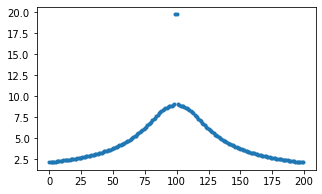

In [23]:
# to do inference with the trained engine, input x_obs and desired effective sample size of the posterior sample

x_err = 0.01
np.random.seed(0)

y_true = [-3,-2.1,-0.1,0.1,0.1]
x_obs = triple(y_true) + np.random.normal(size=n) * x_err

plt.figure(figsize=(5,3))
plt.errorbar(range(n), x_obs, yerr=x_err, fmt='.')
plt.show()

Samples outside prior N = 143
surrogate posterior


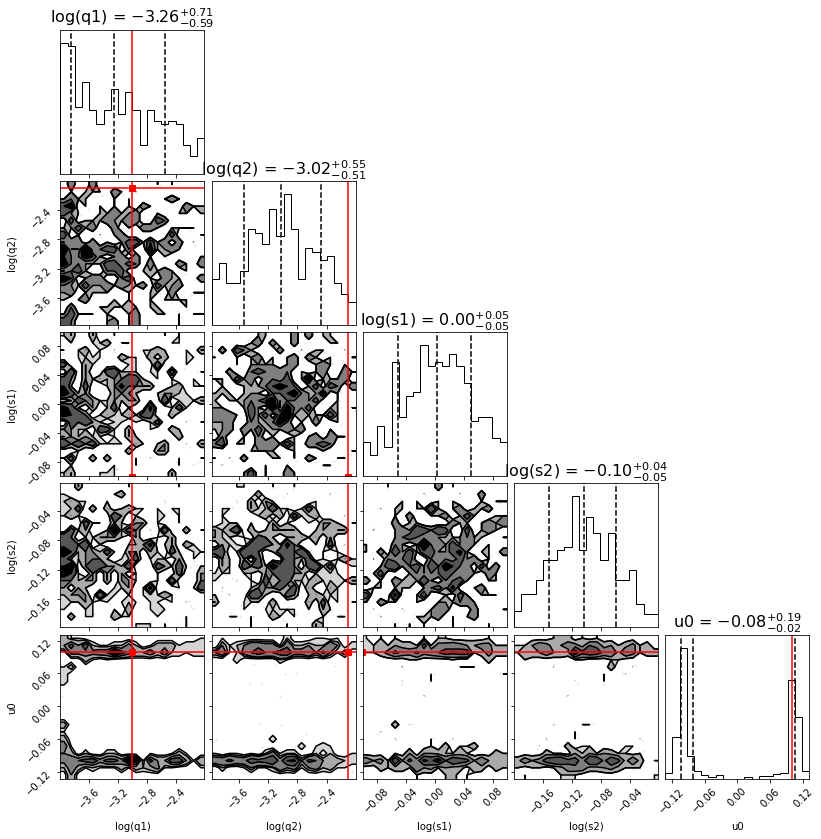

Generating simulations


26it [00:01, 18.68it/s]


Initial n_eff = 0.9
Sampling efficiency = 0.2%
Sampling efficiency below minimum required. 
Consider increasing min_f_accept


In [24]:
# the first corner plot is the nbi surrogate posterior
# the second corner plot is the importance reweighted posterior
ys, weights = engine.predict(x_obs, x_err=np.array([0.5]), neff_target=500, f_min=0.1, y_true=y_true, corner_after=True, corner_before=True)

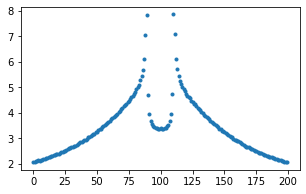

In [18]:
# to do inference with the trained engine, input x_obs and desired effective sample size of the posterior sample

x_err = 0.01
np.random.seed(0)

y_true = [-2.4,-3,-0.02,0.5,-0.2]
x_obs = triple(y_true) + np.random.normal(size=n) * x_err

plt.figure(figsize=(5,3))
plt.errorbar(range(n), x_obs, yerr=x_err, fmt='.')
plt.show()

Samples outside prior N = 1687
surrogate posterior


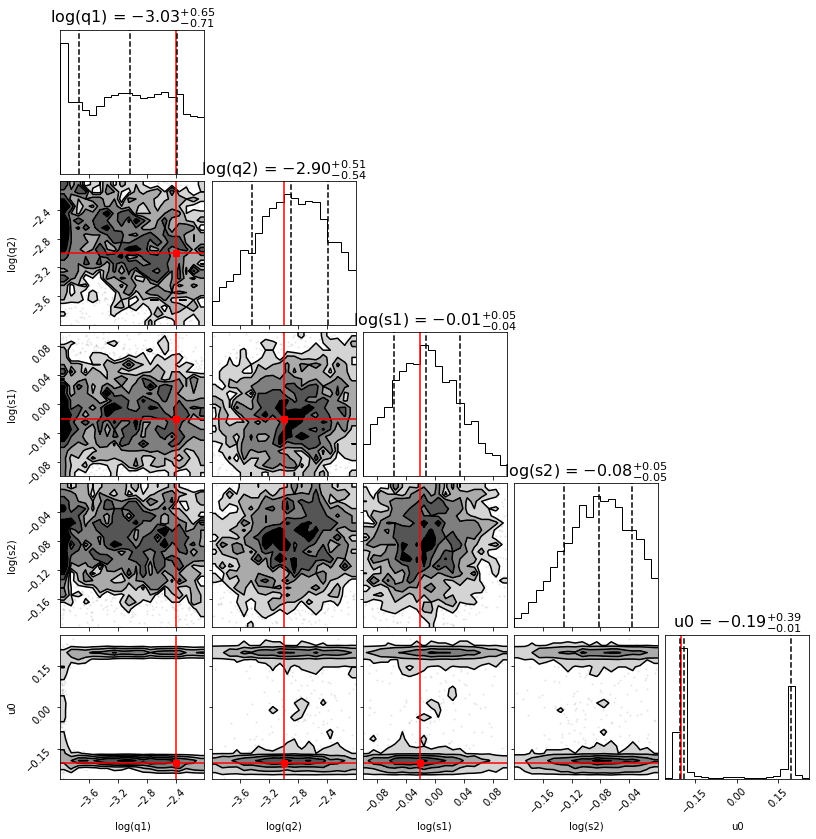

Generating simulations


237it [00:12, 19.51it/s]


Initial n_eff = 3.3
Sampling efficiency = 0.1%
Sampling efficiency below minimum required. 
Consider increasing min_f_accept


In [21]:
# the first corner plot is the nbi surrogate posterior
# the second corner plot is the importance reweighted posterior
ys, weights = engine.predict(x_obs, x_err=np.array([0.5]), neff_target=5000, f_min=0.1, y_true=y_true, corner_after=True, corner_before=True)

<ErrorbarContainer object of 3 artists>

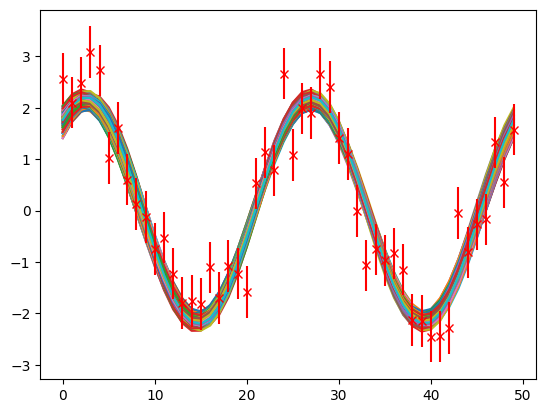

In [14]:
# posterior predictive checks
# select top 1000 best fitting parameters
ind = np.argsort(weights)
xs = np.array([sine(ys[i]) for i in ind[-100:]])
plt.plot(xs.T)
plt.errorbar(range(50), x_obs, yerr=0.5, fmt='rx')

# load trained model

In [7]:
# hyperparameters for the normalizing flow
flow_config = {
    'flow_hidden': 32,
    'num_cond_inputs': 32,
    'num_blocks': 4
}

# the NBI package provides predefined featurizer NNs for certain types of data
# including 1D sequences
featurizer_config = {
    'type': 'sequence',
    'dim_in': 1,
    'dim_conv_max': 256,
    'depth': 3
}


# initialize NBI engine
engine = nbi.NBI(
    featurizer_config,
    flow_config=flow_config,
    simulator=sine,
    noise=noise,
    prior=prior,
    labels=labels,
    n_jobs=10
)

In [8]:
engine.load_checkpoint('test/0/4.pth', 'test/0/x_scales.npy', 'test/0/y_scales.npy')